## Create ROOT file from `ASTERIA` simulation

Starting NU_E simulation...       DONE
Starting NU_E_BAR simulation...   DONE
Starting NU_X simulation...       DONE
Starting NU_X_BAR simulation...   DONE


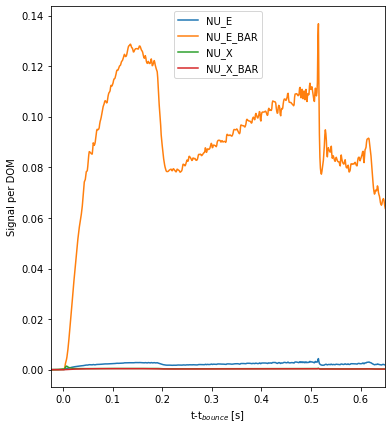

In [1]:
from asteria.simulation import Simulation
from snewpy.neutrino import Flavor
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.utils.exceptions import AstropyDeprecationWarning
import numpy as np
import uproot
import os
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, AstropyDeprecationWarning))

model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 27*u.Msun,
             'eos': 'LS220'}
         }
sim = Simulation(model=model,
                 distance=10 * u.kpc, 
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=-1*u.s, tmax=10*u.s, dt=1*u.ms,
                 mixing_scheme='AdiabaticMSW',
                 hierarchy='normal')
sim.run()

time = np.append(sim.time, sim.time[-1] + sim._sim_dt)


fig, ax = plt.subplots(1, figsize = (6,7))
for flavor in sim.flavors:
    ax.plot(sim.time, sim.avg_dom_signal(flavor), label=flavor.name)
ax.legend()
ax.set(xlabel=r't-t$_{bounce}$ [s]', ylabel='Signal per DOM', xlim=(-0.025, 0.65));

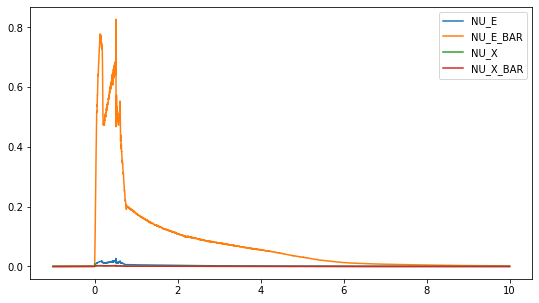

In [2]:
fig, ax = plt.subplots(1, figsize=(9,5))

for flavor in Flavor:
    ax.plot(sim.time, sim.E_per_V[flavor], label=flavor.name)
ax.legend()

### Create ROOT file

Create `np.histogram`, using the simulation time binning and total 

In [3]:
outfile = 'test.root'
file = uproot.recreate(outfile)
file['total_photonic_energy_distance_1kpc'] = np.histogram(sim.time.value, bins=time.value, weights=sim.total_E_per_V.value)
file['total_photonic_energy_distance_1kpc']

<TH1D (version 3) at 0x7fd06d510880>

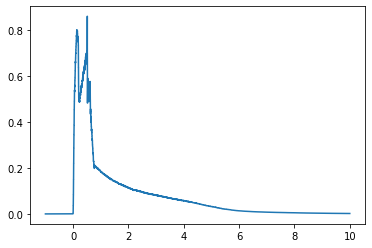

In [4]:
variable = np.histogram(sim.time.value, bins=time.value, weights=sim.total_E_per_V.value)
plt.step(variable[1][:-1], variable[0])